In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

prep_data = pd.read_csv("Prep-CustomerAddress.csv")

### Bivariate Analysis

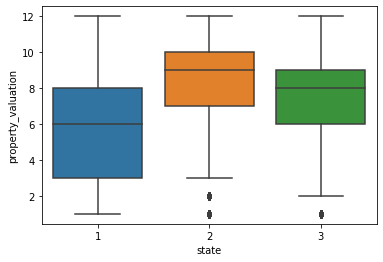

In [2]:
sns.boxplot(x=prep_data['state'], y=prep_data['property_valuation'])

Let's join the customer demographic with address and analyze how outliers contribute to number of purchases before handling. 

### Merge Customer Address and Demographic

In [3]:
address_data = prep_data
demographic_data = pd.read_csv("Prep2-CustomerDemographic.csv")

In [4]:
address_data.head()

,customer_id,state,property_valuation
0,1,2,10
1,2,2,10
2,4,1,9
3,5,2,4
4,6,3,9


In [5]:
demographic_data.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,Age
0,1,1,93,1.0,1,1,11.0,64.0
1,2,0,81,2.0,1,1,16.0,37.0
2,3,0,61,3.0,1,1,15.0,63.0
3,4,0,33,4.0,1,0,7.0,56.0
4,5,1,56,NaN,2,1,8.0,40.0


In [6]:
customer_data = pd.merge(left=demographic_data, right=address_data, how='left', left_on='customer_id', right_on='customer_id')

In [7]:
customer_data.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,Age,state,property_valuation
0,1,1,93,1.0,1,1,11.0,64.0,2.0,10.0
1,2,0,81,2.0,1,1,16.0,37.0,2.0,10.0
2,3,0,61,3.0,1,1,15.0,63.0,NaN,NaN
3,4,0,33,4.0,1,0,7.0,56.0,1.0,9.0
4,5,1,56,NaN,2,1,8.0,40.0,2.0,4.0


In [8]:
customer_data.describe()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,Age,state,property_valuation
count,3992.000000,3992.000000,3992.000000,3336.000000,3992.000000,3992.000000,3992.000000,3992.000000,3988.000000,3988.000000
mean,2001.285070,0.553607,48.859469,4.096823,1.755261,0.506012,10.664078,39.882014,2.045386,7.515547
std,1154.369283,0.539246,28.718055,2.525535,0.834289,0.500026,5.598675,12.410597,0.680221,2.824879
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,15.000000,1.000000,1.000000
25%,1002.750000,0.000000,24.000000,2.000000,1.000000,0.000000,6.000000,31.000000,2.000000,6.000000
50%,2001.500000,1.000000,48.000000,4.000000,1.000000,1.000000,11.000000,40.000000,2.000000,8.000000
75%,3000.250000,1.000000,73.000000,7.000000,3.000000,1.000000,15.000000,49.000000,3.000000,10.000000
max,4000.000000,2.000000,99.000000,9.000000,3.000000,1.000000,22.000000,64.000000,3.000000,12.000000


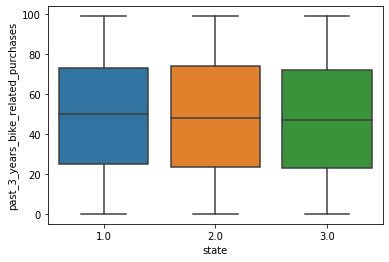

In [9]:
sns.boxplot(x=customer_data['state'], y=customer_data['past_3_years_bike_related_purchases'])

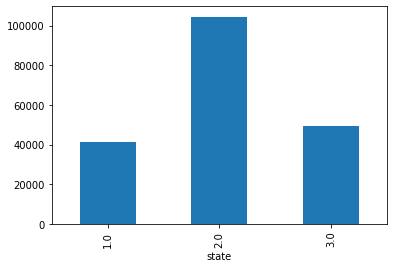

In [10]:
map_state_purchase = customer_data.groupby('state').past_3_years_bike_related_purchases.sum()
map_state_purchase.plot(kind='bar')

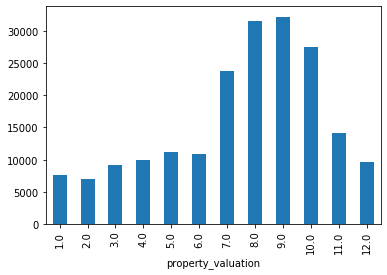

In [11]:
map_state_purchase = customer_data.groupby('property_valuation').past_3_years_bike_related_purchases.sum()
map_state_purchase.plot(kind='bar')

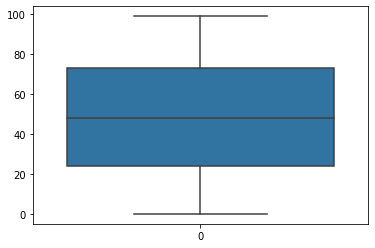

In [12]:
sns.boxplot(data=customer_data['past_3_years_bike_related_purchases'])

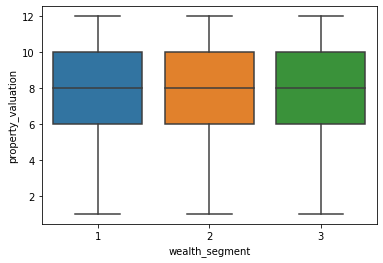

In [13]:
sns.boxplot(x=customer_data['wealth_segment'], y=customer_data['property_valuation'])

In [14]:
customer_outlier_records_state2 = customer_data.loc[((customer_data['state']==2) & (customer_data['property_valuation']<3)) | ((customer_data['state']==3) & (customer_data['property_valuation']<2)), ['customer_id', 'past_3_years_bike_related_purchases', 'state', 'property_valuation']]
customer_outlier_records_state2.describe()
#144

,customer_id,past_3_years_bike_related_purchases,state,property_valuation
count,144.000000,144.000000,144.000000,144.000000
mean,2157.979167,49.638889,2.291667,1.263889
std,1125.785665,28.291839,0.456116,0.442278
min,80.000000,0.000000,2.000000,1.000000
25%,1351.000000,26.000000,2.000000,1.000000
50%,2225.000000,49.000000,2.000000,1.000000
75%,3173.500000,73.000000,3.000000,2.000000
max,3997.000000,98.000000,3.000000,2.000000


In [15]:
customer_outlier_records_state3 = customer_data.loc[((customer_data['state']==3) & (customer_data['property_valuation']<2)), ['customer_id', 'past_3_years_bike_related_purchases', 'state', 'property_valuation']]
customer_outlier_records_state3.describe()
#42

,customer_id,past_3_years_bike_related_purchases,state,property_valuation
count,42.000000,42.000000,42.0,42.0
mean,1933.928571,52.642857,3.0,1.0
std,1047.702024,31.824075,0.0,0.0
min,80.000000,1.000000,3.0,1.0
25%,1347.000000,27.500000,3.0,1.0
50%,1933.000000,50.000000,3.0,1.0
75%,2598.750000,81.500000,3.0,1.0
max,3817.000000,98.000000,3.0,1.0


In [16]:
customer_data['property_valuation'].fillna(7, inplace=True)

In [17]:
customer_data.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_industry_category,wealth_segment,owns_car,tenure,Age,state,property_valuation
0,1,1,93,1.0,1,1,11.0,64.0,2.0,10.0
1,2,0,81,2.0,1,1,16.0,37.0,2.0,10.0
2,3,0,61,3.0,1,1,15.0,63.0,NaN,7.0
3,4,0,33,4.0,1,0,7.0,56.0,1.0,9.0
4,5,1,56,NaN,2,1,8.0,40.0,2.0,4.0


In [19]:
customer_data.to_csv("Tx-CustomerData.csv", index=False)

## Data Exploration Highlights